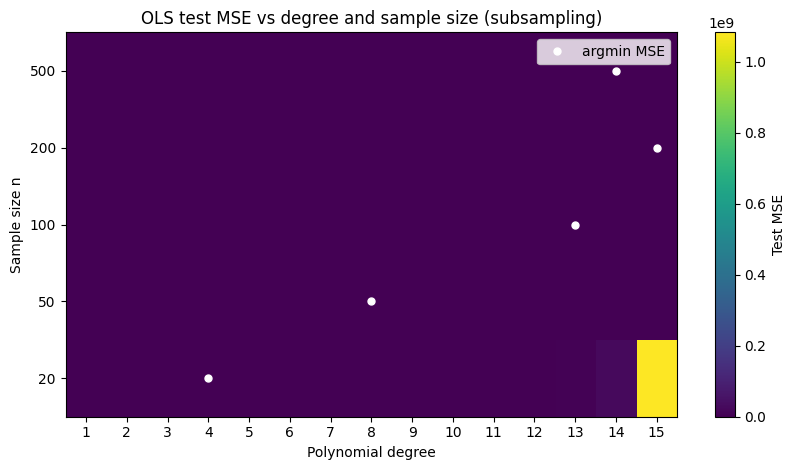

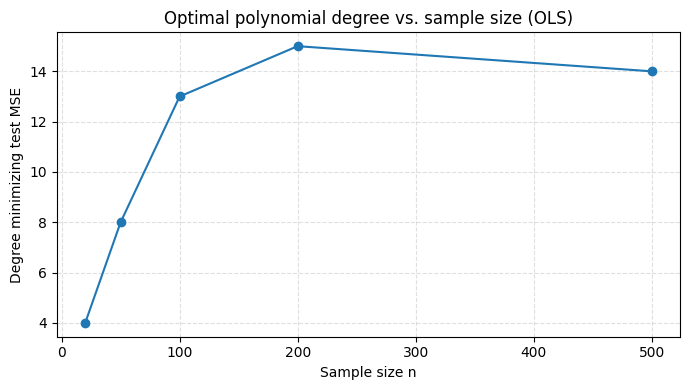

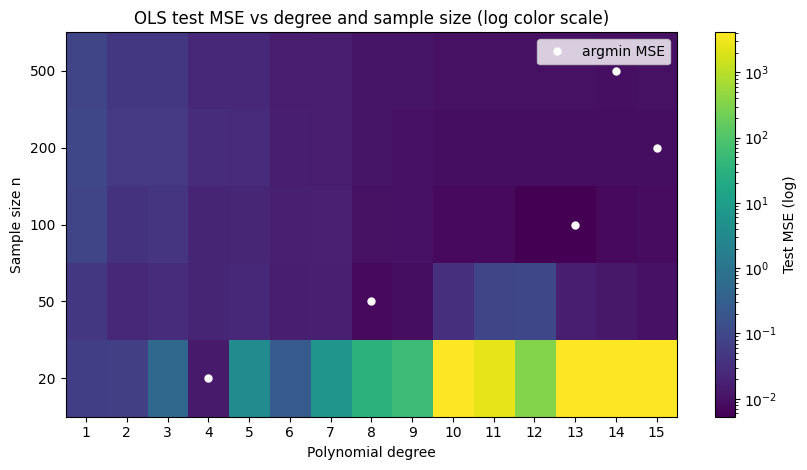

In [4]:
# --- Part (a): MSE as a function of (degree, n) ---

import numpy as np
import matplotlib.pyplot as plt

# sample sizes and degree range
ns = [20, 50, 100, 200, 500]
deg_max = 15

# one common underlying dataset to isolate the effect of n (subsampling)
x_big, y_big = make_data(n=max(ns), noise_sd=0.1, seed=999)
X_big = build_features(x_big, degree=deg_max, include_bias=False)

# collect test MSE curves for each n
mse_grid = []           # shape -> (len(ns), deg_max)
best_deg = []           # degree that minimizes test MSE for each n

rng = np.random.default_rng(42)
for n in ns:
    idx = rng.choice(len(x_big), size=n, replace=False)
    X_n, y_n = X_big[idx], y_big[idx]

    degrees, mse_deg, r2_deg, norms_deg = sweep_degree(
        X_n, y_n, split_func=split_and_scale, deg_max=deg_max
    )
    mse_grid.append(mse_deg)
    best_deg.append(int(degrees[int(np.argmin(mse_deg))]))

mse_grid = np.vstack(mse_grid)  # (len(ns), deg_max)

# ---- Figure 1: heatmap of test MSE over (degree, n)
fig, ax = plt.subplots(figsize=(8.5, 4.8))
im = ax.imshow(
    mse_grid,
    aspect="auto",
    origin="lower",
    cmap="viridis"
)
ax.set_xticks(np.arange(deg_max))
ax.set_xticklabels(np.arange(1, deg_max+1))
ax.set_yticks(np.arange(len(ns)))
ax.set_yticklabels(ns)
ax.set_xlabel("Polynomial degree")
ax.set_ylabel("Sample size n")
ax.set_title("OLS test MSE vs degree and sample size (subsampling)")

# mark the optimal degree for each n
ax.plot(np.array(best_deg) - 1, np.arange(len(ns)), "wo", ms=5, label="argmin MSE")
ax.legend(loc="upper right", frameon=True)
fig.colorbar(im, ax=ax, label="Test MSE")
fig.tight_layout()
fig.savefig(fig_dir / "ols_mse_heatmap_degree_vs_n.png", dpi=200, bbox_inches="tight", pad_inches=0.2)
plt.show()

# ---- Figure 2: optimal degree as a function of n
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(ns, best_deg, "-o")
ax.set_xlabel("Sample size n")
ax.set_ylabel("Degree minimizing test MSE")
ax.set_title("Optimal polynomial degree vs. sample size (OLS)")
ax.grid(True, ls="--", alpha=0.4)
fig.tight_layout()
fig.savefig(fig_dir / "ols_opt_degree_vs_n.png", dpi=200, bbox_inches="tight", pad_inches=0.2)
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

vmin = max(1e-12, np.nanmin(mse_grid[mse_grid>0]))  # positive for LogNorm
vmax = np.nanpercentile(mse_grid, 95)               # cap extreme outliers

fig, ax = plt.subplots(figsize=(8.5, 4.8))
im = ax.imshow(mse_grid, aspect="auto", origin="lower",
               norm=LogNorm(vmin=vmin, vmax=vmax), cmap="viridis")

ax.set_xticks(np.arange(deg_max)); ax.set_xticklabels(np.arange(1, deg_max+1))
ax.set_yticks(np.arange(len(ns))); ax.set_yticklabels(ns)
ax.set_xlabel("Polynomial degree"); ax.set_ylabel("Sample size n")
ax.set_title("OLS test MSE vs degree and sample size (log color scale)")
ax.plot(np.array(best_deg) - 1, np.arange(len(ns)), "wo", ms=5, label="argmin MSE")
ax.legend(loc="upper right")
fig.colorbar(im, ax=ax, label="Test MSE (log)")
fig.tight_layout(); fig.savefig(fig_dir / "ols_mse_heatmap_log.png", dpi=200, bbox_inches="tight"); plt.show()
